In [1]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import time
import torch
from pymoo.indicators.hv import HV
from pymoo.visualization.scatter import Scatter
from metrics import mean_Euclidean_dist
from pymoo.config import Config
Config.warnings['not_compiled'] = False
from partitioning import sampling_vector_randomly, sampling_vector_evenly
from pymoo.util.ref_dirs import get_reference_directions
from problem import get_problem
from pymoo.problems import get_problem as get_problem2

In [2]:
problem_name = "DTLZ2"
n_sample = 50

pref_vec_test = get_reference_directions("das-dennis", 3, n_partitions=50)
truth_front =  np.transpose(get_problem2("dtlz2").pareto_front(pref_vec_test))

pref_vec_test = sampling_vector_evenly(3, 300)
f_truth =  get_problem2("dtlz2").pareto_front(pref_vec_test)

n_sample = 50
r = 1
u = np.linspace(0, np.pi/2, n_sample)
v = np.linspace(0, np.pi/2, n_sample)
a = np.expand_dims(r*np.outer(np.cos(u), np.sin(v)).flatten(), axis=1)
b = np.expand_dims(r*np.outer(np.sin(u), np.sin(v)).flatten(), axis=1)
c = np.expand_dims(r*np.outer(np.ones(np.size(u)), np.cos(v)).flatten(), axis=1)
front_truth =  np.hstack((a,b,c))

In [3]:
def plot_front_1(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"weight/ablation_{problem_name}_PSL"
    index = [16, 20, 24, 28, 32, 36, 40, 44, 48]
    y_value = np.load(f"{log_dir}/y_{problem_name}_{n_dim}{suffix}.npy")
    font_size = 10
    scatter_size = 10
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    
    fig, axs = plt.subplots(figsize = (10, 10), ncols = int(len(index)/3), nrows=3, layout="constrained", subplot_kw=dict(projection='3d'))
    axs = axs.flatten()
    
    for i, ind in enumerate(index):    
        y_truth, y_hat = y_value[ind - 1], front_value[ind - 1]
        euclidean_score = mean_Euclidean_dist(f_truth, y_hat)
        axs[i].view_init(elev=10., azim=30)
        axs[i].scatter(truth_front[0], truth_front[1], truth_front[2], color="green", s=0.1, label="DTLZ2 Pareto Front")
        axs[i].scatter(y_hat[:, 0], y_hat[:, 1], y_hat[:, 2], s=scatter_size , zorder=2, color = "blue", label = "Pareto Solutions computed by Surrogate Model")
        axs[i].set_title(f"Number of evaluations: {5*ind+180}", fontsize=font_size, y=0.97)
        axs[i].set_xlabel(r'$f_1(x)$', color="blue")
        axs[i].set_ylabel(r'$f_2(x)$', color="blue")
        axs[i].set_zlabel(r'$f_3(x)$', rotation=0, color="blue")
        axs[i].zaxis.labelpad=-0.7
        # axs[i].set_title(f"Iteration: {ind}\nPareto front score: {round(euclidean_score, 6)}", fontsize=font_size)
        
    fig.legend(*axs[1].get_legend_handles_labels(), bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, fontsize=font_size)
    fig.suptitle(f"{title} on {problem_name} with {n_dim} variables",fontweight="bold",fontsize=font_size + 5)
    fig.savefig(f"visualization_plot/Front_{problem_name}-{title}.pdf", bbox_inches='tight')
    plt.show()

In [4]:
def plot_front_2(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"weight/ablation_{problem_name}_PSL"
    index = [16, 20, 24, 28, 32, 36, 40, 44, 48]
    y_value = np.load(f"{log_dir}/y_{problem_name}_{n_dim}{suffix}.npy")
    font_size = 10
    scatter_size = 10
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    
    fig, axs = plt.subplots(figsize = (10, 10), ncols = int(len(index)/3), nrows=3, layout="constrained", subplot_kw=dict(projection='3d'))
    axs = axs.flatten()
    
    for i, ind in enumerate(index):   
        ind += 40
        y_truth, y_hat = y_value[ind - 1], front_value[ind - 1]
        euclidean_score = mean_Euclidean_dist(f_truth, y_hat)
        axs[i].view_init(elev=10., azim=30)
        axs[i].scatter(truth_front[0], truth_front[1], truth_front[2], color="green", s=0.1, label="DTLZ2 Pareto Front")
        axs[i].scatter(y_hat[:, 0], y_hat[:, 1], y_hat[:, 2], s=scatter_size , zorder=2, color = "blue", label = "Pareto Solutions computed by Surrogate Model")
        axs[i].set_title(f"Number of evaluations: {5*ind-20}", fontsize=font_size, y=0.97)
        axs[i].set_xlabel(r'$f_1(x)$', color="blue")
        axs[i].set_ylabel(r'$f_2(x)$', color="blue")
        axs[i].set_zlabel(r'$f_3(x)$', rotation=0, color="blue")
        axs[i].zaxis.labelpad=-0.7
        fig.suptitle(f"{title} - Problem {problem_name}",fontweight="bold",fontsize=font_size + 5)
        
    fig.legend(*axs[1].get_legend_handles_labels(), bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, fontsize=font_size)
    fig.suptitle(f"{title} on {problem_name} with {n_dim} variables",fontweight="bold",fontsize=font_size + 5)
    fig.savefig(f"visualization_plot/Front_{problem_name}-{title}.pdf", bbox_inches='tight')
    plt.show()

In [5]:
def Mean_Euclidean_distance_plot(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"weight/ablation_{problem_name}_PSL"
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    euclidean_score = []
    for i in range(50):
        euclidean_score.append(mean_Euclidean_dist(f_truth, front_value[i]))
        
    plt.plot(euclidean_score, color = "green")
    plt.ylabel(r"Mean Euclidean distance score")
    plt.xlabel("Iteration")
    plt.title(f"{title}")
    plt.show()

In [6]:
def Mean_Euclidean_distance_ablation(problem_name = "DTLZ2", n_dim = 6):
    MED_original, MED_warmup, MED_init_uniform, MED_2stage_DGEMO_220_uniform = [],[],[],[]
    log_dir = f"weight/ablation_{problem_name}_PSL"
    
    f_original = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_original.npy")
    f_init_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_uniform.npy")
    f_warmup = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup.npy")
    f_2stage_DGEMO_220_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_uniform.npy")
    
    for i in range(40, 80):
        MED_original.append(mean_Euclidean_dist(f_truth, f_original[i]))
        MED_init_uniform.append(mean_Euclidean_dist(f_truth, f_init_uniform[i]))
    for i in range(40):
        
        MED_warmup.append(mean_Euclidean_dist(f_truth, f_warmup[i]))
        MED_2stage_DGEMO_220_uniform.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_uniform[i]))
        
    plt.plot(MED_original, color = "black", label = "PSL-MOBO")
    plt.plot(MED_init_uniform, color = "green", label = r"Co-PSL with stage 2 only")
    plt.plot(MED_warmup, color = "orange", label = "Co-PSL with stage 1 only")
    plt.plot(MED_2stage_DGEMO_220_uniform, color = "purple", label = "Co-PSL")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Iteration")
    # plt.axis(xmin=0, xmax=49)
    # plt.xticks([0, 10, 20, 30, 40, 49], [220, 270, 320, 370, 420, 470])
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.savefig(f"visualization_plot/MED_ablation_DTLZ2.pdf", bbox_inches='tight')
    plt.show()

In [7]:
def Mean_Euclidean_distance_ablation_init(problem_name = "DTLZ2", n_dim = 6):
    MED_init_uniform, MED_2stage_DGEMO_220_uniform, MED_init_gaussian, MED_2stage_DGEMO_220_gaussian = [],[],[],[]
    log_dir = f"weight/ablation_{problem_name}_PSL"
    
    f_init_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_uniform.npy")
    f_2stage_DGEMO_220_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_uniform.npy")
    f_init_gaussian = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_gaussian.npy")
    f_2stage_DGEMO_220_gaussian = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_gaussian.npy")
    
    
    for i in range(40):
        MED_init_uniform.append(mean_Euclidean_dist(f_truth, f_init_uniform[i]))
        MED_2stage_DGEMO_220_uniform.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_uniform[i]))
        MED_init_gaussian.append(mean_Euclidean_dist(f_truth, f_init_gaussian[i]))
        MED_2stage_DGEMO_220_gaussian.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_gaussian[i]))
        
    
    plt.plot(MED_init_uniform, color = "green", label = r"Co-PSL with stage 2 only (Uniform)")
    plt.plot(MED_init_gaussian, color = "blue", label = r"Co-PSL with stage 2 only (Gaussian)")
    plt.plot(MED_2stage_DGEMO_220_uniform, color = "orange", label = "Co-PSL (Uniform Stage 2)")
    plt.plot(MED_2stage_DGEMO_220_gaussian, color = "purple", label = "Co-PSL (Gaussian Stage 2)")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Iteration")
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.show()

In [8]:
def Log_Hypervolume_difference_ablation(problem_name = "DTLZ2", n_dim = 6):
    log_dir = f"weight/ablation_{problem_name}_PSL"
    Y_evaluation_original = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_original.npy') 
    Y_evaluation_init = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_init_uniform.npy')
    Y_evaluation_warmup = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_warmup.npy')
    Y_evaluation_2stage = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_warmup_init_DGEMO_220_uniform.npy')
    problem = get_problem(problem_name)
    ref_point = problem.nadir_point 
    ref_point = [1.1 * x  for x in ref_point]
    hv = HV(ref_point=np.array(ref_point))
    truth_pareto = front_truth
    max_HV = hv(truth_pareto)
    n_evaluation = 420
    

    hv_original, hv_init, hv_warmup, hv_2stage = [], [], [], []
    for i in range(n_evaluation):
        hv_original.append(hv(Y_evaluation_original[:i]))
        hv_init.append(hv(Y_evaluation_init[:i]))
        
    for i in range(n_evaluation):
        hv_warmup.append(hv(Y_evaluation_warmup[:i]))
        hv_2stage.append(hv(Y_evaluation_2stage[:i]))
        
    n_train_eval = 40 * 5
        
    
    plt.plot(np.log(np.clip(max_HV - hv_original, a_min=1e-14, a_max=max_HV)), color='black', linewidth=1, label=f"PSL-MOBO")
    plt.plot(np.log(np.clip(max_HV - hv_warmup, a_min=1e-14, a_max=max_HV)), color='orange', linewidth=1, label=f"Co-PSL stage 1 only")
    plt.plot(np.log(np.clip(max_HV - hv_init, a_min=1e-14, a_max=max_HV)), color='green', linewidth=1, label=r"Co-PSL stage 2 only")
    plt.plot(np.log(np.clip(max_HV - hv_2stage, a_min=1e-14, a_max=max_HV)), color='purple', linewidth=1, label=f"Co-PSL")
    
    plt.axvline(x = 220, color = 'black', linestyle='dashed', linewidth = 1, label=f"Warmup 220 evaluations")
    
    plt.ylabel("Log Hypervolume difference")
    plt.xlabel("Number of evaluation")
    plt.title(f"Log Hypervolume difference between the learned Pareto \n front and truth Pareto Front after total 420 evaluations")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.savefig(f"visualization_plot/LHD_ablation_{problem_name}.pdf", bbox_inches='tight')
    plt.show()

In [9]:
def Log_Hypervolume_difference_init_ablation(problem_name = "DTLZ2", n_dim = 5):
    log_dir = f"weight/ablation_{problem_name}_PSL"
    Y_evaluation_init_uniform = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_init_uniform.npy')
    Y_evaluation_2stage_uniform = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_warmup_init_DGEMO_220_uniform.npy')
    Y_evaluation_init_gaussian = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_init_gaussian.npy')
    Y_evaluation_2stage_gaussian = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_warmup_init_DGEMO_220_gaussian.npy')
    problem = get_problem(problem_name)
    ref_point = problem.nadir_point 
    ref_point = [1.1 * x  for x in ref_point]
    hv = HV(ref_point=np.array(ref_point))
    truth_pareto = front_truth
    max_HV = hv(truth_pareto)
    n_evaluation = 420

    hv_init_gaussian, hv_init_uniform, hv_2stage_gaussian, hv_2stage_uniform = [], [], [], []
    for i in range(n_evaluation):
        hv_init_uniform.append(hv(Y_evaluation_init_uniform[:i]))
        hv_init_gaussian.append(hv(Y_evaluation_init_gaussian[:i]))
        
    for i in range(n_evaluation):
        hv_2stage_gaussian.append(hv(Y_evaluation_2stage_gaussian[:i]))
        hv_2stage_uniform.append(hv(Y_evaluation_2stage_uniform[:i]))
        
    n_train_eval = 40 * 5
        
    
    plt.plot(np.log(np.clip(max_HV - hv_init_gaussian, a_min=1e-14, a_max=max_HV)), color='black', linewidth=1, label=f"Co-PSL with Stage 2 only (Gaussian)")
    plt.plot(np.log(np.clip(max_HV - hv_init_uniform, a_min=1e-14, a_max=max_HV)), color='purple', linewidth=1, label=f"Co-PSL with Stage 2 only (Uniform)")
    plt.plot(np.log(np.clip(max_HV - hv_2stage_uniform, a_min=1e-14, a_max=max_HV)), color='blue', linewidth=1, label=f"Co-PSL (Uniform Stage 2)")
    plt.plot(np.log(np.clip(max_HV - hv_2stage_gaussian, a_min=1e-14, a_max=max_HV)), color='green', linewidth=1, label=f"Co-PSL (Gaussian Stage 2)")
    
    plt.axvline(x = 220, color = 'black', linestyle='dashed', linewidth = 1, label=f"Warmup milestone")
    
    plt.ylabel("Log Hypervolume difference")
    plt.xlabel("Number of evaluation")
    plt.title(f"Log Hypervolume difference {problem_name} - N dim: {n_dim}\nWarmup evaluations: 220\nTraining evaluations: {n_train_eval}")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.55), ncols=2)
    plt.show()

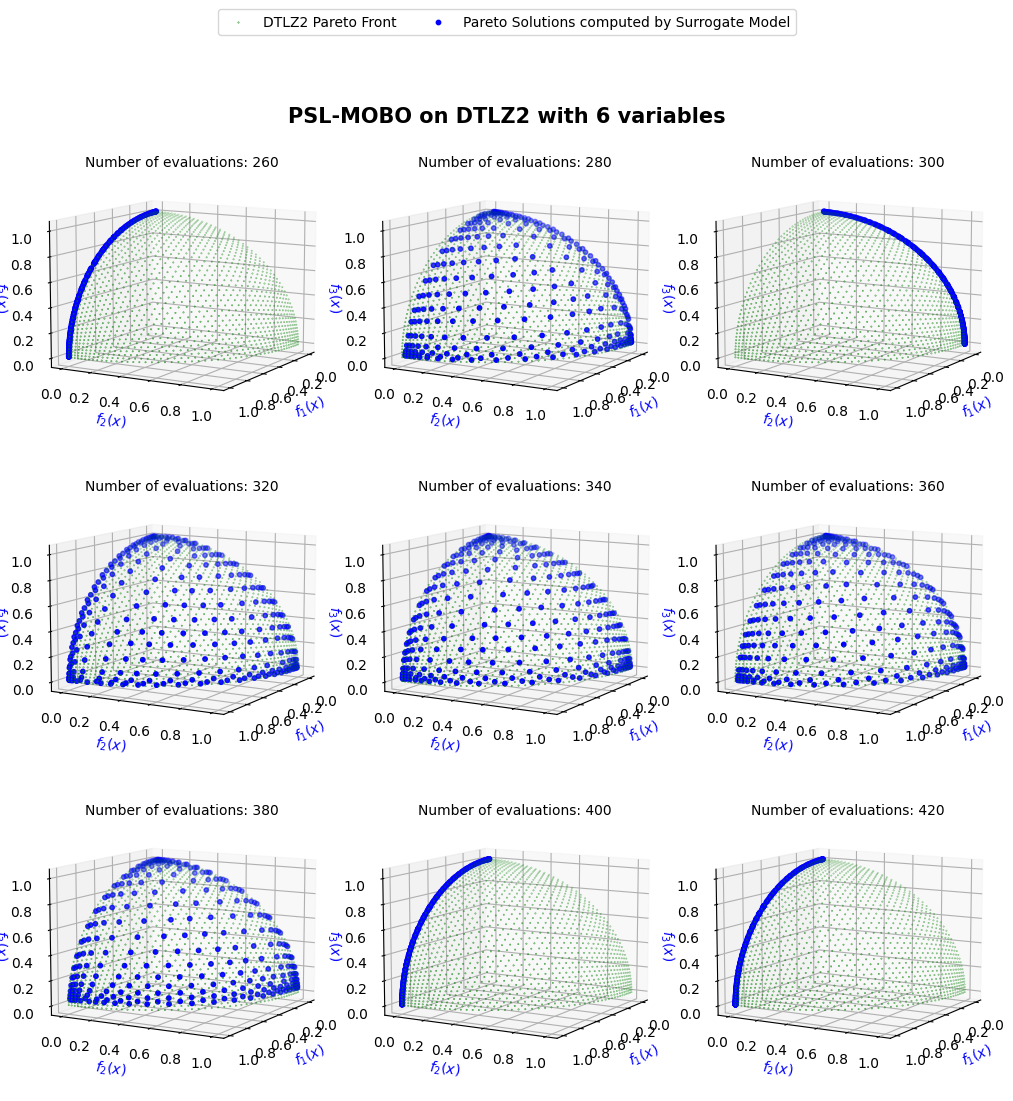

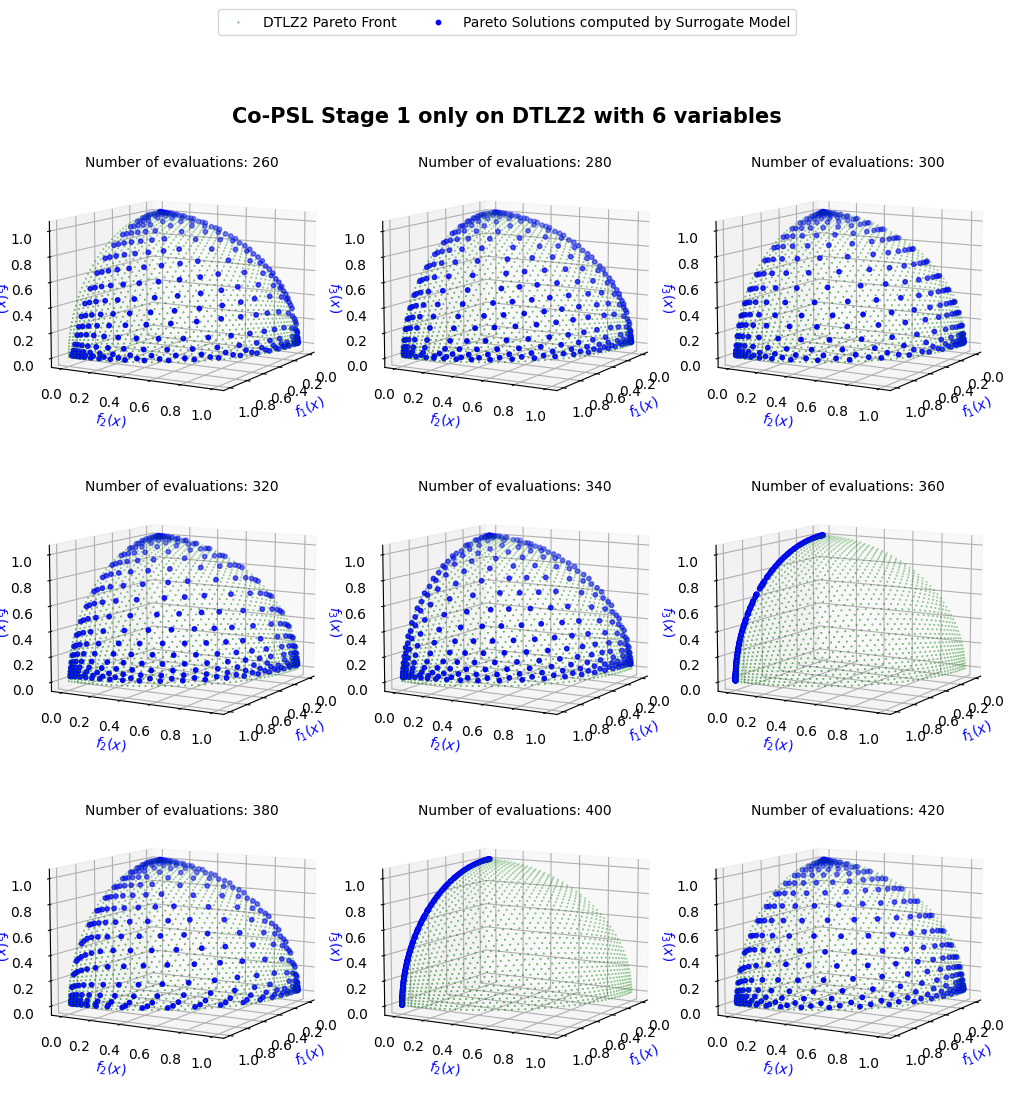

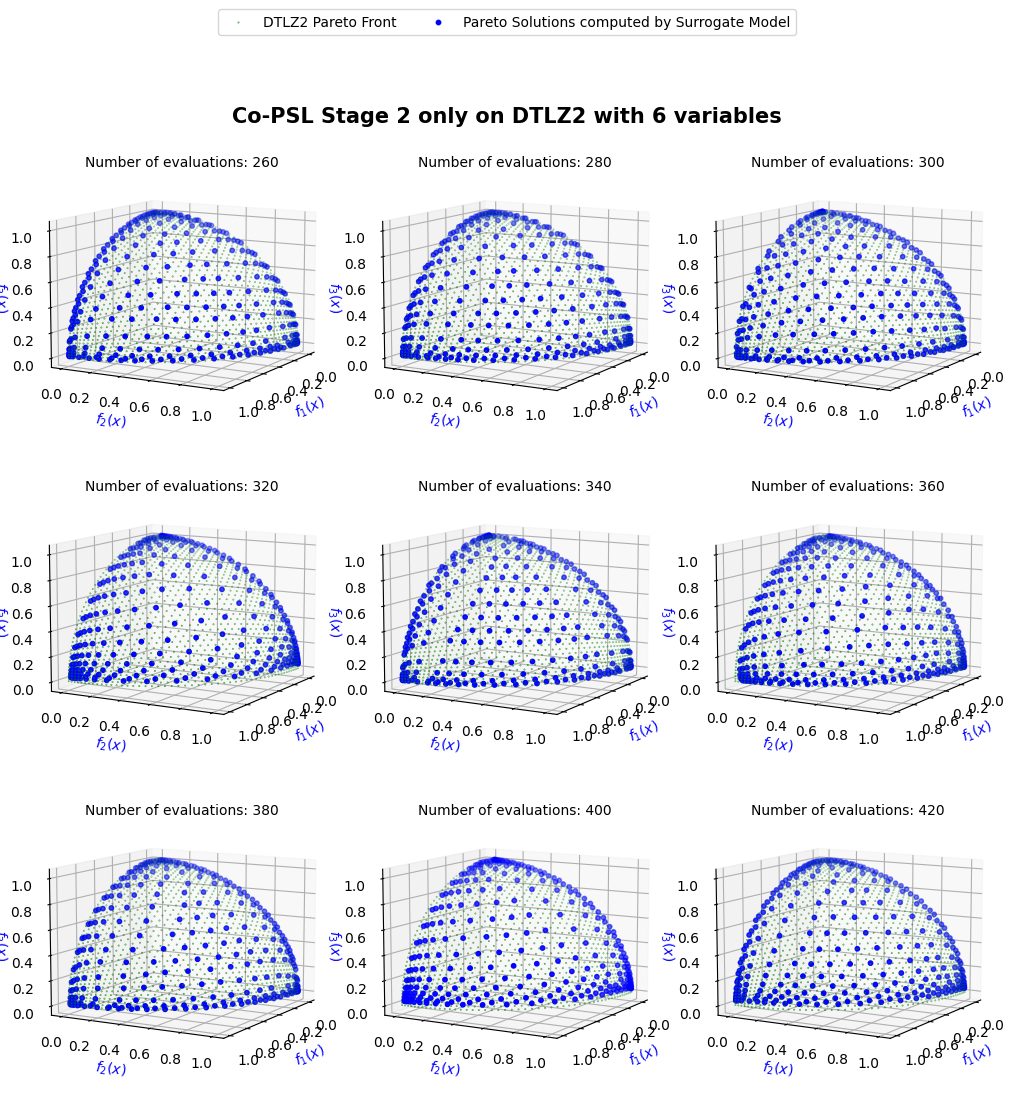

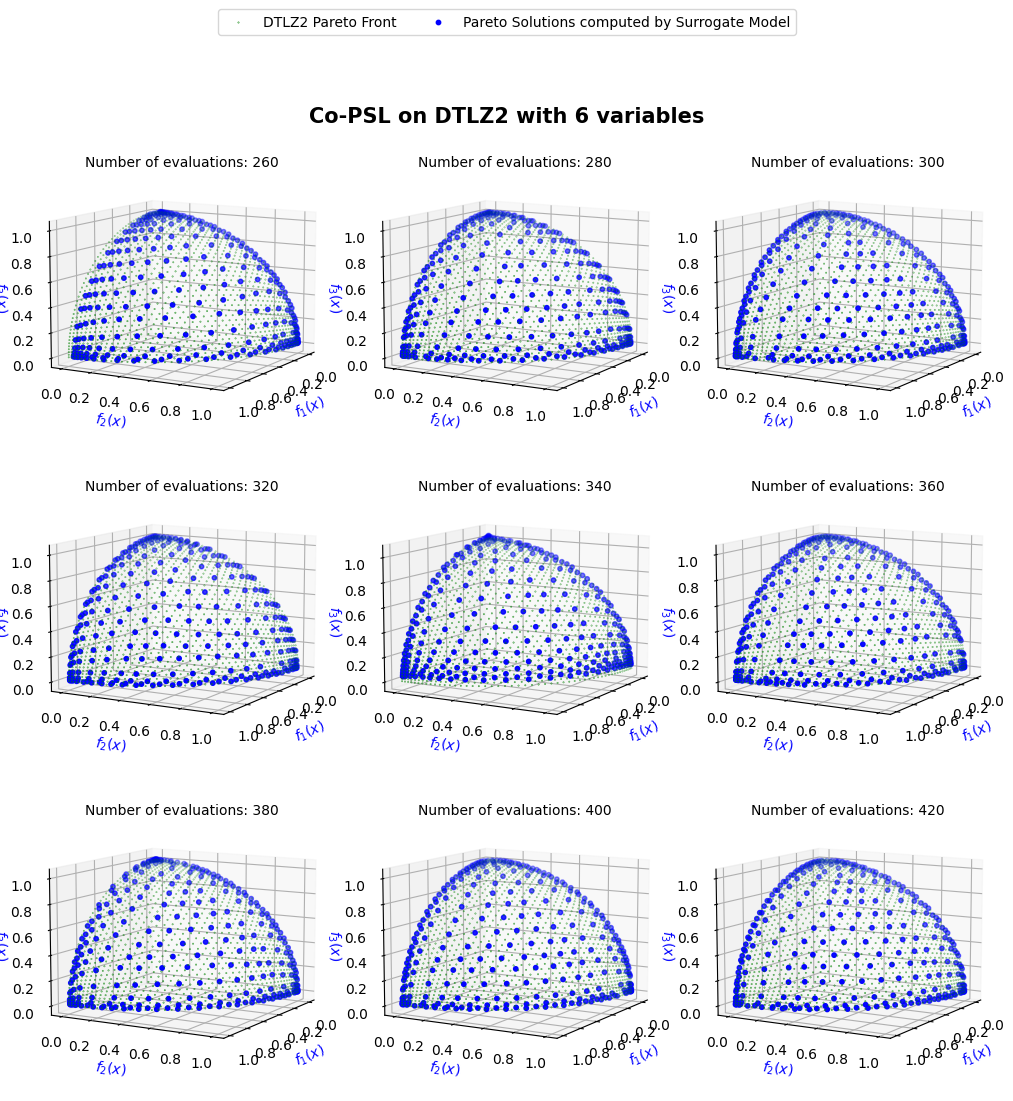

In [10]:
n_dim = 6
plot_front_2("DTLZ2", n_dim = n_dim, suffix="_original", title = "PSL-MOBO")
plot_front_1("DTLZ2", n_dim, suffix="_warmup", title = "Co-PSL Stage 1 only")
plot_front_2("DTLZ2", n_dim, suffix="_init_uniform", title = "Co-PSL Stage 2 only")
plot_front_1("DTLZ2", n_dim, suffix="_warmup_init_DGEMO_120_gaussian", title = "Co-PSL")

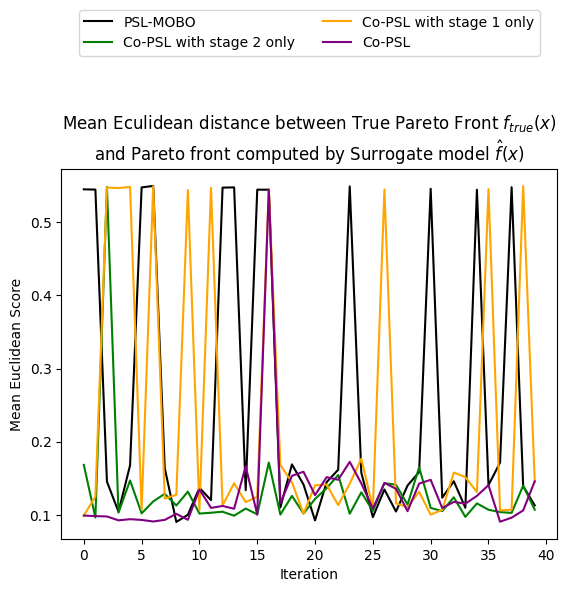

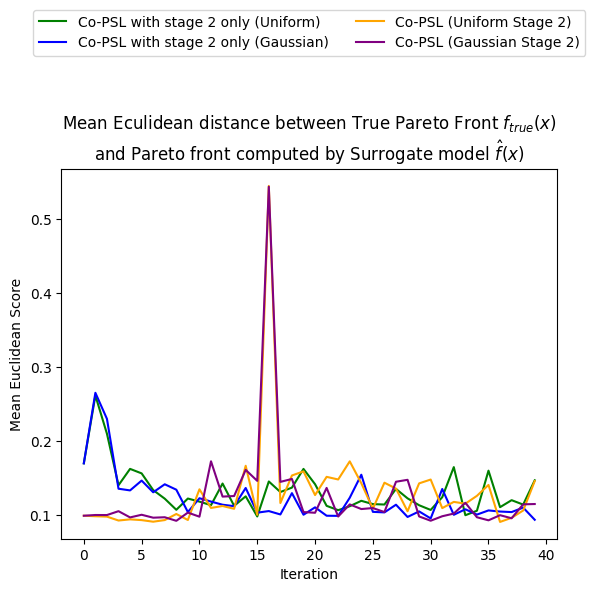

In [11]:
Mean_Euclidean_distance_ablation("DTLZ2", n_dim)
Mean_Euclidean_distance_ablation_init("DTLZ2", n_dim)

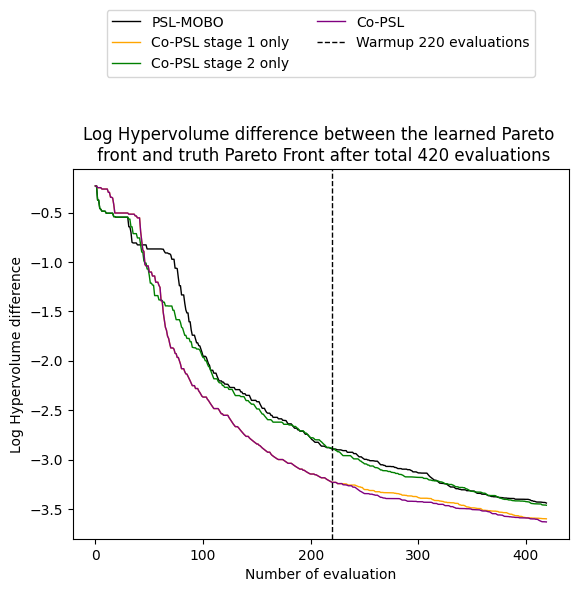

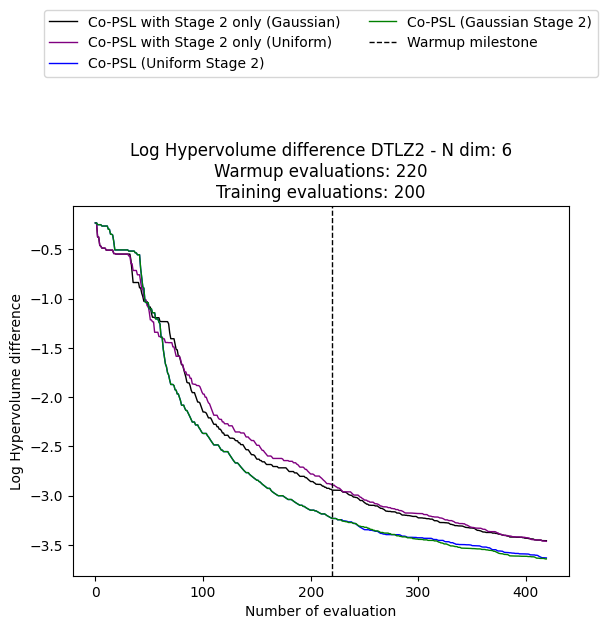

In [12]:
Log_Hypervolume_difference_ablation(problem_name, n_dim = 6)
Log_Hypervolume_difference_init_ablation(problem_name, n_dim = 6)